In [1335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

Анализ данных (Взят dataset из первой лабораторной)

In [1336]:
dataset = pd.read_csv('dataset.csv', delimiter=' ')
print(f'dataset shape: {dataset.shape}')
dataset.head()

dataset shape: (525, 10)


,Unnamed: 0,author_of_the_book,bonuses_to_get_after_buying,book_title,new_price,old_price,rating_of_the_book,stars_given_by_users,the_path_to_see_the_cover_of_the_book,the_sale_today_in_float
0,0,Цао Сюэ-цинь,254,Сон в красном тереме в 2 т. (комплект)...,1698,1999.0,4.57,28,pics/image10.jpg,0.15
1,1,Оскар Уайльд,30,Портрет Дориана Грея,200,259.0,4.10,2568,pics/image11.jpg,0.22
2,2,Сосэки Нацумэ,41,Ваш покорный слуга кот,276,339.0,3.74,545,pics/image12.jpg,0.18
3,3,Ло Гуань-чжун,176,Троецарствие: роман,1176,1399.0,4.30,93,pics/image13.jpg,0.15
4,4,Михаил Булгаков,80,Мастер и Маргарита,534,679.0,4.00,188,pics/image14.jpg,0.21


Старая цена на книги и их количество


<Axes: >

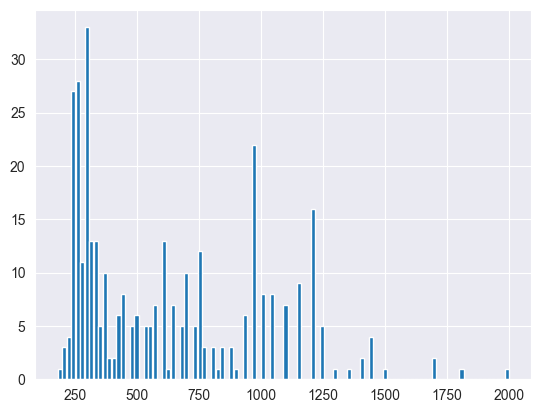

In [1337]:
print('Старая цена на книги и их количество')
dataset.old_price.hist(bins=100, rwidth=0.9)

Новая цена на книги и их количество


<Axes: >

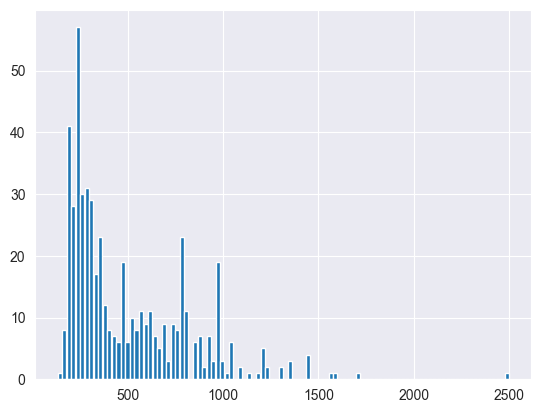

In [1338]:
print('Новая цена на книги и их количество')
dataset.new_price.hist(bins=100, rwidth=0.9)

Количество авторов: 187


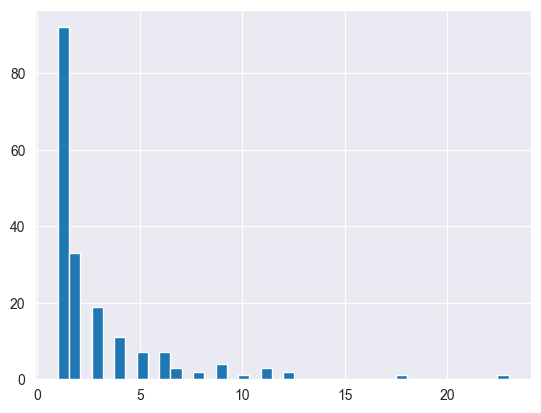

In [1339]:
print(f'Количество авторов: {len(dataset.author_of_the_book.unique())}')
authors = dataset.value_counts('author_of_the_book').hist(bins=40)

In [1340]:
dataset["old_price"] = dataset.old_price.fillna (0)
dataset["new_price"] = dataset.new_price.fillna (0)

In [1341]:
y = dataset["new_price"]
dataset = dataset.drop(["new_price"], axis=1)
dataset = dataset.drop(["the_path_to_see_the_cover_of_the_book"], axis=1)

In [1342]:
dataset = dataset.drop(["author_of_the_book"], axis=1)
dataset = dataset.drop(["Unnamed: 0"], axis=1)
dataset = dataset.drop(["book_title"], axis=1)
dataset_normalized = (dataset - dataset.min()) / (dataset.max() - dataset.min())

До нормализации

In [1343]:
dataset.head()

,bonuses_to_get_after_buying,old_price,rating_of_the_book,stars_given_by_users,the_sale_today_in_float
0,254,1999.0,4.57,28,0.15
1,30,259.0,4.10,2568,0.22
2,41,339.0,3.74,545,0.18
3,176,1399.0,4.30,93,0.15
4,80,679.0,4.00,188,0.21


Новый датасет с применением нормализации

In [1344]:
dataset = dataset_normalized
dataset_normalized.head()

,bonuses_to_get_after_buying,old_price,rating_of_the_book,stars_given_by_users,the_sale_today_in_float
0,0.661972,1.000000,0.914,0.009766,0.405405
1,0.030986,0.129565,0.820,0.895710,0.594595
2,0.061972,0.169585,0.748,0.190094,0.486486
3,0.442254,0.699850,0.860,0.032438,0.405405
4,0.171831,0.339670,0.800,0.065574,0.567568


Разбиение набора данных на (train, test, valid)

In [1345]:
main_dataset, test_dataset, main_y, test_y = train_test_split(dataset, y, test_size=0.1)
train_dataset, valid_dataset, train_y, valid_y = train_test_split(main_dataset, main_y, test_size=0.1)

В качестве функции ошибки выбрана r2_score

In [1346]:
def fit_and_predict(model, tr_err, v_err, t_err, err):
    model.fit(train_dataset, train_y)
    tr_err = predict_for_train(model, tr_err, err)
    v_err = predict_for_valid(model, v_err, err)
    t_err = predict_for_test(model, t_err, err)
    return tr_err, v_err, t_err

In [1347]:
def predict_for_test(model, error, err):
    error.append(err(test_y,model.predict(test_dataset)))
    return error

In [1348]:
def predict_for_valid(model, error, err):
    error.append(err(valid_y,model.predict(valid_dataset)))
    return error

In [1349]:
def predict_for_train(model, error, err):
    error.append(err(train_y,model.predict(train_dataset)))
    return error

In [1350]:
def picture(array, param, tr_err, v_err, t_err):
    plt.grid = True
    plt.plot(array, tr_err, label="train")
    plt.plot(array, v_err, label="valid")
    plt.plot(array, t_err, label="test")
    plt.xlabel(param)
    plt.ylabel("ошибка")
    plt.legend()
    plt.show()

In [1351]:
def picture_simple(array, tr_err):
    plt.figure(figsize=(3,3))
    plt.plot(array, tr_err, label="train")
    plt.legend()
    plt.show()

Модель k ближайших соседей

In [1352]:
test_err, valid_err, train_err = [], [], []
for i in range(1, 101):
    neighbors = KNeighborsRegressor(n_neighbors=i)
    train_err, valid_err, test_err = fit_and_predict(neighbors, train_err, valid_err, test_err, r2_score)    

KNeighborsRegressor

 График зависимости r2_score от new_price на train

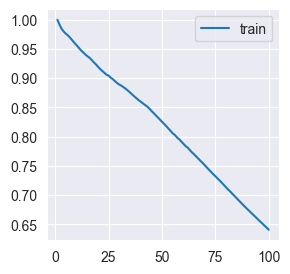

In [1353]:
picture_simple(range(1, 101), train_err)

 График зависимости r2_score от new_price на train, valid, test множествах

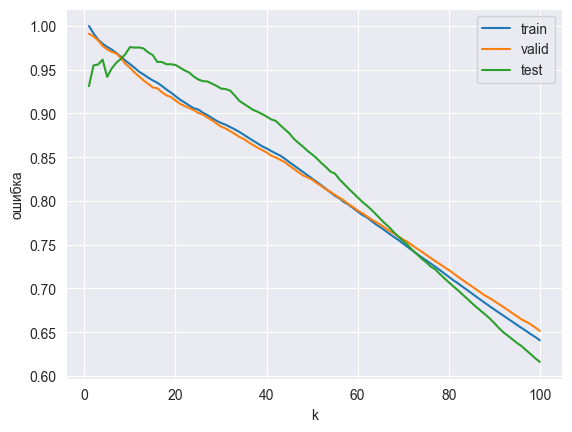

In [1354]:
picture(range(1, 101), "k", train_err, valid_err, test_err)

Деревья принятия решений

In [1355]:
test_err, valid_err, train_err = [], [], []
for i in range(1, 101):
    tree = DecisionTreeClassifier(max_depth=i)
    train_err, valid_err, test_err = fit_and_predict(tree, train_err, valid_err, test_err, r2_score)

DecisionTreeClassifier

 График зависимости r2_score от new_price на train

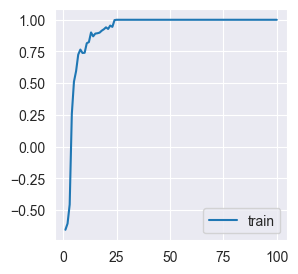

In [1356]:
picture_simple(range(1, 101), train_err)

 График зависимости r2_score от new_price на train, valid, test множествах

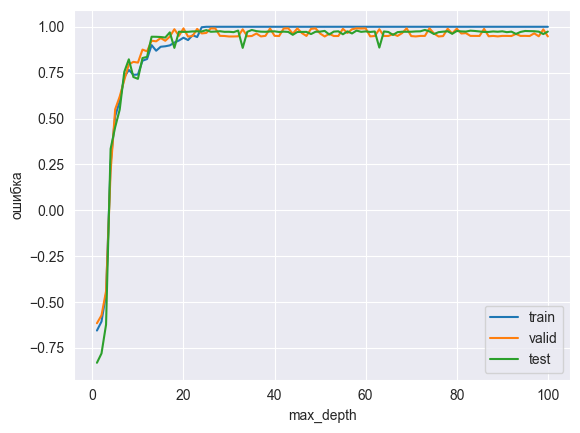

In [1357]:
picture(range(1, 101), "max_depth", train_err, valid_err, test_err)   

Ансамбль

In [1358]:
test_err, valid_err, train_err = [], [], []
for i in range(10, 101):
    ensemble = RandomForestRegressor(n_estimators=i)
    train_err, valid_err, test_err = fit_and_predict(ensemble, train_err, valid_err, test_err, r2_score)

RandomForestRegressor

 График зависимости r2_score от new_price на train

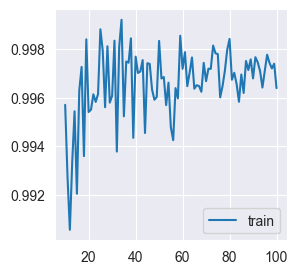

In [1359]:
picture_simple(range(10, 101), train_err) 

 График зависимости r2_score от new_price на train, valid, test множествах

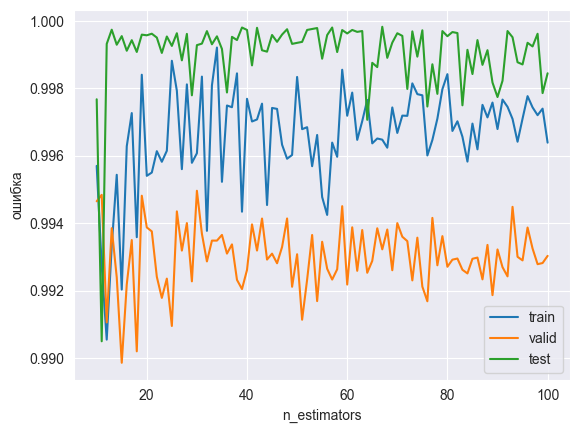

In [1360]:
picture(range(10, 101), "n_estimators", train_err, valid_err, test_err) 

Линейная модель

In [1361]:
test_err, valid_err, train_err = [], [], []
for i in range(32):
    ridge = Ridge(np.exp(i))
    train_err, valid_err, test_err = fit_and_predict(ridge, train_err, valid_err, test_err, r2_score)

Ridge

 График зависимости r2_score от new_price на train

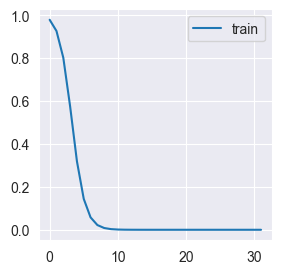

In [1362]:
picture_simple(range(32), train_err)

 График зависимости r2_score от new_price на train, valid, test множествах

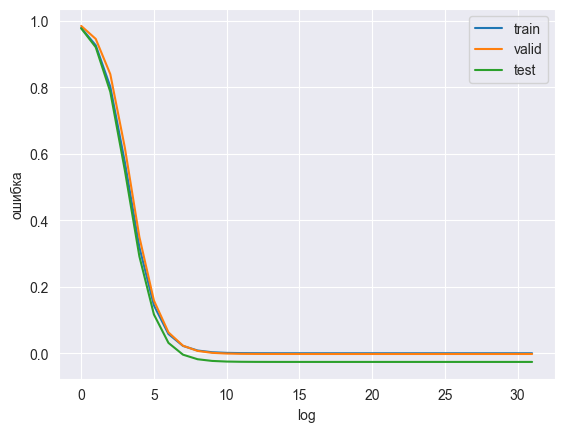

In [1363]:
picture(range(32), "log", train_err, valid_err, test_err) 